In [ ]:
from google.colab import drive
import pandas as pd  

In [ ]:
drive.mount('/content/gdrive')
!touch "/content/gdrive/MyDrive/files"

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/test/dataa.csv")
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,...,meds_musclerelaxants,meds_pre-natalvitamins,meds_psychotherapeuticdrugs,meds_sedative/hypnotics,meds_skinpreps,meds_smokingdeterrents,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,n_surgeries
0,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,Other,...,0,0,0,0,0,0,0,0,0,1
1,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,...,0,0,0,0,0,0,0,0,0,2
2,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,...,0,0,0,0,0,0,0,0,0,2
3,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,...,0,0,0,0,0,0,0,0,0,2
4,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,...,0,0,0,1,0,0,0,0,1,5


In [ ]:
data = data.drop(["race","lang","employstatus","ethnicity"], axis=1)

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
perc = 1
min_count = int(((100-perc)/100)*data.shape[1] + 1)
data = data.dropna( axis=0,thresh=min_count)

In [ ]:
gender = {'Male': 0,'Female': 1}
data['gender']=data['gender'].map(gender)


religion= {'None':0, 'Pentecostal':1, 'Catholic':2, 'Protestant':3, 'Christian':4,
       'Other':5, 'Unknown':6, 'Baptist':7, 'Methodist':8, 'Episcopal':9, 'Jewish':10,
       'Muslim':11, "Jehovah's Witness":12}
data['religion']=data['religion'].map(religion)

maritalstatus= {'Single':0, 'Married':1, 'Widowed':2, 'Significant Other':3, 'Divorced':4,
       'Legally Separated':5, 'Other':6, 'Unknown':7, 'Life Partner':8,
       'Civil Union':9}
data['maritalstatus']=data['maritalstatus'].map(maritalstatus)

insurance_status= {'Other':0, 'Commercial':1, 'Medicare':2, 'Medicaid':3, 'Self pay':4}
data['insurance_status']=data['insurance_status'].map(insurance_status)

disposition= {'Discharge':0, 'Admit':1}
data['disposition']=data['disposition'].map(disposition)

previousdispo	= {'No previous dispo':0, 'Discharge':1, 'Admit':2,
       'Transfer to Another Facility':3, 'AMA':4, 'LWBS after Triage':5,
       'Eloped':6, 'LWBS before Triage':7, 'Observation':8, 'Send to L&D':9}
data['previousdispo']=data['previousdispo'].map(previousdispo)


In [ ]:
#!pip install featurewiz

     |████████████████████████████████| 97 kB 2.8 MB/s 
     |████████████████████████████████| 2.0 MB 14.3 MB/s 
     |████████████████████████████████| 193.7 MB 27 kB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 26.7 MB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 26.0 MB/s 
     |████████████████████████████████| 837 kB 38.0 MB/s 
     |████████████████████████████████| 136 kB 37.7 MB/s 
     |████████████████████████████████| 596 kB 41.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1
  Att

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
import numpy as np 
np.random.seed(1234)

In [ ]:
X = data.drop(['disposition'],axis=1)
 
y = data.disposition.values 

In [ ]:
X_scaled =  StandardScaler().fit_transform(X) 

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [ ]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.8100688505898347

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (456058, 59)
    Loaded train data. Shape = (456058, 59)
    Some column names had special characters which were removed...
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
###################################

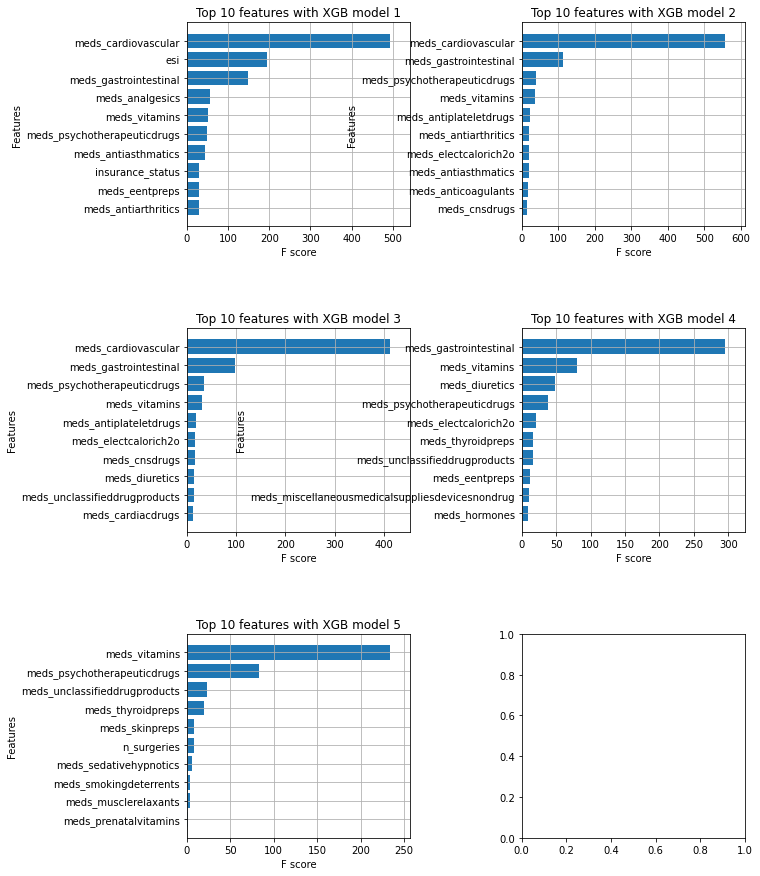

            Total time taken for XGBoost feature selection = 40 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 12 important features:
['meds_cardiovascular', 'esi', 'meds_gastrointestinal', 'meds_analgesics', 'meds_vitamins', 'meds_psychotherapeuticdrugs', 'meds_antiplateletdrugs', 'meds_diuretics', 'meds_electcalorich2o', 'meds_unclassifieddrugproducts', 'meds_thyroidpreps', 'meds_skinpreps']

    Time taken for feature selection = 67 seconds
    Reverted column names to original names given in train dataset


In [ ]:
target = 'disposition'
features, train = featurewiz(data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
print(features)

['meds_cardiovascular', 'esi', 'meds_gastrointestinal', 'meds_analgesics', 'meds_vitamins', 'meds_psychotherapeuticdrugs', 'meds_antiplateletdrugs', 'meds_diuretics', 'meds_elect/caloric/h2o', 'meds_unclassifieddrugproducts', 'meds_thyroidpreps', 'meds_skinpreps']


In [ ]:
X_new = train.drop(['disposition'],axis=1)
y = train.disposition.values 

In [ ]:
X_scaled =  StandardScaler().fit_transform(X_new)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [ ]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.8208349778537911

In [ ]:
logistic_predict = LogisticRegression()
logistic_predict.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred = logistic_predict.predict(X_valid) 
# check performance
accuracy_score(pred,y_valid) 

0.8176007542867166

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
p = clf.predict(X_valid) 
# check performance
accuracy_score(p,y_valid) 

0.813325001096347